In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_excel('QVI_transaction_data.xlsx')
print(file.head(20))
file1=pd.read_csv('QVI_purchase_behaviour.csv')
print(file1.head(20))

     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   43390          1            1000       1         5   
1   43599          1            1307     348        66   
2   43605          1            1343     383        61   
3   43329          2            2373     974        69   
4   43330          2            2426    1038       108   
5   43604          4            4074    2982        57   
6   43601          4            4149    3333        16   
7   43601          4            4196    3539        24   
8   43332          5            5026    4525        42   
9   43330          7            7150    6900        52   
10  43602          7            7215    7176        16   
11  43332          8            8294    8221       114   
12  43603          9            9208    8634        15   
13  43329         13           13213   12447        92   
14  43600         19           19272   16686        44   
15  43604         20           20164   17136        54   
16  43330     

In [2]:
file_main=file.merge(file1,on="LYLTY_CARD_NBR")

In [3]:
print(file_main.head(20))

     DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0   43390          1            1000       1         5   
1   43599          1            1307     348        66   
2   43414          1            1307     346        96   
3   43533          1            1307     347        54   
4   43605          1            1343     383        61   
5   43329          2            2373     974        69   
6   43330          2            2426    1038       108   
7   43604          4            4074    2982        57   
8   43318          4            4074    2978        70   
9   43321          4            4074    2979        60   
10  43446          4            4074    2980         4   
11  43529          4            4074    2981        51   
12  43601          4            4149    3333        16   
13  43287          4            4149    3330        46   
14  43299          4            4149    3331       112   
15  43562          4            4149    3332        87   
16  43601     

In [5]:
file_main.dropna()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [6]:
file_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [7]:
file_main.duplicated().sum()

1

In [8]:
file_main=file_main.drop_duplicates()

In [11]:
file_main_result=file_main.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])

In [18]:
file_plot=file_main.pivot_table("TOT_SALES",index="LIFESTAGE",columns="PREMIUM_CUSTOMER")
file_plot.tail()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
OLDER FAMILIES,7.269570,7.262395,7.322945
OLDER SINGLES/COUPLES,7.430315,7.282116,7.449848
RETIREES,7.443445,7.252262,7.456174
YOUNG FAMILIES,7.287201,7.189025,7.266756
YOUNG SINGLES/COUPLES,6.615624,7.558339,6.629852


In [19]:
file_plot.head()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,7.074661,7.647284,7.112056
NEW FAMILIES,7.297321,7.317806,7.231655
OLDER FAMILIES,7.269570,7.262395,7.322945
OLDER SINGLES/COUPLES,7.430315,7.282116,7.449848
RETIREES,7.443445,7.252262,7.456174


<AxesSubplot:title={'center':'Customer Usage '}, xlabel='LIFESTAGE'>

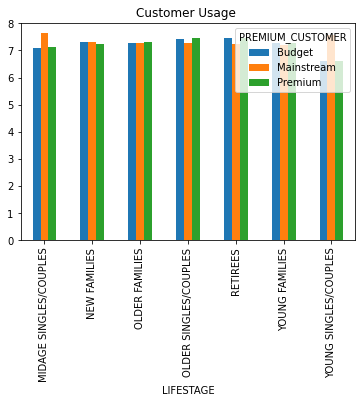

In [45]:
file_plot.plot(title="Customer Usage ",kind="bar")

In [46]:
plt.savefig('Usage of customer.png')

<Figure size 432x288 with 0 Axes>